### Title: Association of BMI Category, Demographic Factors, and Health Behaviors with LDL, HDL, and Systolic Blood Pressure Levels Among Adults Aged 40–60 Using Merged NHANES Data from 2001 to 2018


- **Link to GitHub repo:** [nhanes-cardiovascular-disease-/Biopal.ipynb at main · jacelynnn/nhanes-cardiovascular-disease-](https://github.com/jacelynnn/nhanes-cardiovascular-disease-/blob/main/Biopal.ipynb)

- **Link to Google Colab:** [Biopal.ipynb](https://colab.research.google.com/github/jacelynnn/nhanes-cardiovascular-disease-/blob/main/Biopal.ipynb)


# 4. Background & Rationale

## 4.1 Health Issue and Knowledge Gap
Cardiovascular disease (CVD) remains a major global health issue, with abnormal low-density lipoprotein (LDL) and high-density lipoprotein (HDL) levels and elevated blood pressure being key risk factors (Mensah et al., 2019). Obesity, often measured using body mass index (BMI), is strongly associated with these risk factors and has been shown to influence lipid levels and blood pressure across various populations. While research shows that BMI affects lipid levels and blood pressure, the combined effects of BMI categories, demographic characteristics (such as sex, age and ethnicity), and health-related behaviors (including diet, smoking habits and physical activity) on cardiovascular indicators in mid-life adults required further investigation.

## 4.2 Importance of the Research Question
Investigating these relationships is critical in both public health and biomedical contexts, as it enables earlier detection of risk patterns and supports the design of effective intervention strategies. Adults aged 40-60 are at a transitional life stage where preventive strategies can significantly impact long-term health outcomes. Furthermore, recognizing how demographic and behavioral differences impact cardiovascular risk can support the development of more targeted and effective public health interventions.

## 4.3 Supporting Evidence from Literature
Though NHANES data have been used to explore these relationships, most studies have focused on single variables or shorter timeframes. For example, Rosinger et al. (2012) analyzed cholesterol trends. Few have explored the joint effects of BMI, lifestyle, and demographics on LDL, HDL, and systolic blood pressure over a long period.

## 4.4 Use of NHANES and Study Contribution
This study fills that gap by analyzing merged NHANES data from 2001-2018. By focusing on adults aged 40-60 and integrating multiple variables, it aims to provide deeper insights into cardiovascular risk patterns to guide more precise public health interventions.

# 5. Research Questions and Objectives

## 5.1 Research Question
What is the association between BMI category and cardiovascular biomarkers (LDL cholesterol, HDL cholesterol, and systolic blood pressure) among U.S. adults aged 40–60, and how do demographic factors (gender, race, age) and health behaviors (smoking, alcohol use, physical activity) influence these outcomes?

## 5.2 Justification & Literature Review
Numerous studies have shown that elevated LDL and blood pressure increase the risk of cardiovascular disease (CVD). HDL, conversely, is protective. While these biomarkers are individually well-studied, few investigations consider them jointly across diverse population groups using long-term, nationally representative data. Grundy et al. (2004) focused on LDL and primary prevention strategies but did not incorporate lifestyle factors like smoking and activity. Lee & Taylor (2020) explored physical activity’s effects on lipids, but didn’t account for obesity or racial disparities. Moreover, many analyses use a single NHANES cycle, limiting generalizability. This project uses merged NHANES data from 2001–2018, allowing for richer subgroup analyses across time and a more complete understanding of the interplay between BMI, behavior, and CVD risk.

## 5.3 Gaps Filled by This Project

**Integrated Variable Analysis:**  
Most prior studies have explored cardiovascular risk factors in isolation. This project addresses that limitation by simultaneously evaluating how body composition, demographic characteristics, and modifiable health behaviors interact to influence cardiovascular biomarkers.

**Comprehensive Outcome Coverage:**  
By examining three major indicators of cardiovascular health such as LDL cholesterol, HDL cholesterol, and systolic blood pressure, this study provides a more holistic assessment of cardiometabolic risk than single-biomarker studies.

**Enhanced Statistical Power:**  
Merging NHANES Data from 2001–2018 enables the inclusion of a larger, more representative sample, improving the robustness of subgroup comparisons and trend detection over time.

**Targeted Middle-Aged Population:**  
People aged 40–60 are at the stage where chronic diseases like heart problems often begin to appear, but they are not often studied over long periods. This project focuses on this age group to help support early prevention efforts.

## 5.4 SMART Objectives

- **Specific:** To compare LDL, HDL, and systolic blood pressure levels across BMI categories (underweight, normal, overweight, obese) in U.S. adults aged 40–60.  
  **Measurable:** Differences will be tested using ANOVA and visualized using boxplots.  
  **Achievable:** BMI and biomarker data are available across NHANES cycles.  
  **Relevant:** These variables are major CVD risk factors.  
  **Time-bound:** This objective will be completed by Week 4.

- **Specific:** To evaluate the association between physical activity level and HDL cholesterol levels in middle-aged U.S. adults.  
  **Measurable:** Mean HDL will be compared across activity levels using t-tests.  
  **Achievable:** Physical activity data (PAQ605) is consistently measured in NHANES.  
  **Relevant:** HDL is cardioprotective and influenced by lifestyle.  
  **Time-bound:** Statistical testing will be completed by Week 5.

- **Specific:** To determine if smoking status is associated with higher systolic blood pressure in adults aged 40–60.  
  **Measurable:** Group differences will be analyzed using t-tests.  
  **Achievable:** Smoking and BP data are available in all selected NHANES cycles.  
  **Relevant:** Smoking and high BP are major contributors to heart disease.  
  **Time-bound:** Results will be documented by Week 5.

- **Specific:** To assess whether race and gender modify the effect of BMI on LDL levels in U.S. adults aged 40–60.  
  **Measurable:** Interaction effects will be analyzed using subgroup comparison.  
  **Achievable:** Race and gender data are reliably available across all cycles.  
  **Relevant:** Health disparities across subgroups are a key public health concern.  
  **Time-bound:** Analysis will be finalized by Week 6.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# --- Step 2: Define paths for all .xpt files (make sure they're saved locally if needed) ---
from pathlib import Path
folder_path = Path("/mnt/data")

In [ ]:
years = ["2001","2003","2005", "2007", "2009", "2011", "2013", "2015", "2017"]
cycles = ["B","C","D", "E", "F", "G", "H", "I", "J"]

In [ ]:
demo_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/DEMO_{c}.xpt"
             for y, c in zip(years, cycles)]
df_demo = pd.concat([pd.read_sas(url) for url in demo_urls])
df_demo = df_demo[["SEQN", "RIAGENDR", "RIDAGEYR", "DMQMILIT", "INDFMPIR"]]

In [ ]:
bmi_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BMX_{c}.xpt"
            for y, c in zip(years, cycles)]
df_bmi = pd.concat([pd.read_sas(url) for url in bmi_urls])
df_bmi = df_bmi[["SEQN", "BMXBMI"]]

In [ ]:
smoking_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/SMQ_{c}.xpt"
                for y, c in zip(years, cycles)]
df_smoking = pd.concat([pd.read_sas(url) for url in smoking_urls])
df_smoking = df_smoking[["SEQN", "SMQ020", "SMQ040"]]

In [ ]:
drinking_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/ALQ_{c}.xpt"
                for y, c in zip(years, cycles)]
df_drinking = pd.concat([pd.read_sas(url) for url in drinking_urls])
df_drinking = df_drinking[["SEQN", "ALQ101", "ALQ130"]]

In [ ]:
physical_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/PAQ_{c}.xpt"
                for y, c in zip(years, cycles)]
df_physical = pd.concat([pd.read_sas(url) for url in physical_urls])
df_physical = df_physical[["SEQN", "PAD680", "PAD660", "PAD675"]]
#PAD660 Minutes/day vigorous activity
#PAD675 Minutes/day moderate activity

In [ ]:
# Correct URLs for blood pressure data (BPX)
blood_pressure_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BPX_{c}.xpt"
                       for y, c in zip(years, cycles)]

# Read and combine all BPX datasets
df_blood_pressure = pd.concat([pd.read_sas(url, format='xport') for url in blood_pressure_urls], ignore_index=True)

# Select systolic blood pressure readings 1 & 2
df_blood_pressure = df_blood_pressure[["SEQN", "BPXSY1", "BPXSY2"]]

In [ ]:
# Define NHANES cycles and corresponding file names
years = ["2001", "2003", "2005", "2007", "2009", "2011", "2013", "2015", "2017"]
cycles = ["B", "C", "D", "E", "F", "G", "H", "I", "J"]
file_prefixes = ["L13", "L13", "TCHOL", "TCHOL", "TCHOL", "TRIGLY", "TRIGLY", "TRIGLY", "TRIGLY"]

In [ ]:
# Collect all data in a list
df_list = []

# Loop through each year-cycle and load HDL/LDL
for year, cycle, prefix in zip(years, cycles, file_prefixes):
    url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year.replace('-', '')}/DataFiles/{prefix}_{cycle}.XPT"
    try:
        df = pd.read_sas(url)
        # Select only SEQN, HDL and LDL if they exist
        cols = [col for col in ['SEQN', 'LBDHDD', 'LBDLDL'] if col in df.columns]
        if cols:
            df_filtered = df[cols].copy()
            df_filtered["Cycle"] = year
            df_list.append(df_filtered)
            print(f"✅ Loaded: {prefix}_{cycle} ({year})")
        else:
            print(f"⚠️ Skipped {prefix}_{cycle} ({year}) - HDL/LDL not found")
    except Exception as e:
        print(f"❌ Failed to load {prefix}_{cycle}: {e}")

✅ Loaded: L13_B (2001)
✅ Loaded: L13_C (2003)
✅ Loaded: TCHOL_D (2005)
✅ Loaded: TCHOL_E (2007)
✅ Loaded: TCHOL_F (2009)
✅ Loaded: TRIGLY_G (2011)
✅ Loaded: TRIGLY_H (2013)
✅ Loaded: TRIGLY_I (2015)
✅ Loaded: TRIGLY_J (2017)


In [ ]:
# Concatenate all data
df_hdl_ldl = pd.concat(df_list, ignore_index=True)

# Preview
print("\n✅ Combined Dataset Shape:", df_hdl_ldl.shape)
df_hdl_ldl.head()


✅ Combined Dataset Shape: (55422, 3)


,SEQN,Cycle,LBDLDL
0,9966.0,2001,NaN
1,9967.0,2001,NaN
2,9968.0,2001,NaN
3,9969.0,2001,NaN
4,9970.0,2001,NaN


In [ ]:
# Merge all dataframes on SEQN using left join
df = (df_demo
    .merge(df_bmi, on="SEQN", how="left")
    .merge(df_smoking, on="SEQN", how="left")
    .merge(df_drinking, on="SEQN", how="left")
    .merge(df_physical, on="SEQN", how="left")
    .merge(df_blood_pressure, on="SEQN", how="left")
    .merge(df_hdl_ldl[['SEQN', 'Cycle']], on="SEQN", how="left") # Include Cycle from df_hdl_ldl here
)

In [ ]:
print(df.shape)
print(df.columns)
df.head()


(91351, 16)
Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMQMILIT', 'INDFMPIR', 'BMXBMI',
       'SMQ020', 'SMQ040', 'ALQ101', 'ALQ130', 'PAD680', 'PAD660', 'PAD675',
       'BPXSY1', 'BPXSY2', 'Cycle'],
      dtype='object')


,SEQN,RIAGENDR,RIDAGEYR,DMQMILIT,INDFMPIR,BMXBMI,SMQ020,SMQ040,ALQ101,ALQ130,PAD680,PAD660,PAD675,BPXSY1,BPXSY2,Cycle
0,9966.0,1.0,39.0,2.0,2.93,30.22,1.0,1.0,NaN,2.0,NaN,NaN,NaN,128.0,126.0,2001
1,9967.0,1.0,23.0,2.0,NaN,29.98,2.0,NaN,NaN,1.0,NaN,NaN,NaN,106.0,100.0,2001
2,9968.0,2.0,84.0,2.0,0.68,24.62,1.0,3.0,NaN,1.0,NaN,NaN,NaN,120.0,NaN,2001
3,9969.0,2.0,51.0,2.0,5.00,22.26,2.0,NaN,NaN,2.0,NaN,NaN,NaN,120.0,118.0,2001
4,9970.0,1.0,16.0,NaN,3.42,39.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,118.0,2001


In [ ]:
total_participants = df.shape[0]
print("Total number of participants:", total_participants)


Total number of participants: 91351


## 6. Variable and Data Sources

### Continuous Variables

| Variable   | Unit    | Source Dataset                      | Description                      | Clinical Significance                                                |
|------------|---------|-------------------------------------|----------------------------------|-----------------------------------------------------------------------|
| **LBDLDL** | mg/dL   | L13AM_B, L13AM_C, TRIGLY_D–TRIGLY_I | LDL cholesterol (bad cholesterol) | Elevated levels increase risk of atherosclerosis and cardiovascular disease |
| **LBDHDD** | mg/dL   | L13AM_B, L13AM_C, TRIGLY_D–TRIGLY_I | HDL cholesterol (good cholesterol) | Protective factor against heart disease                             |
| **BPXSY1** | mmHg    | BPX_B – BPX_I                        | Systolic blood pressure (1st reading) | Indicator of hypertension and cardiovascular strain               |
| **BMXBMI** | kg/m²   | BMX_B – BMX_I                        | Body Mass Index                   | Used to classify weight status and predict cardiometabolic risk     |
| **RIDAGEYR** | Years | DEMO_B – DEMO_I                      | Age                               | Risk factor for many chronic diseases including CVD                 |

---

### Categorical Variables

| Variable     | Codes                               | Source Dataset     | Description                       | Clinical Significance                                                |
|--------------|--------------------------------------|--------------------|-----------------------------------|-----------------------------------------------------------------------|
| **RIAGENDR** | 1 = Male<br>2 = Female               | DEMO_B – DEMO_I    | Gender                            | Evaluates if risk factors impact genders differently                 |
| **RIDRETH1** | 1–5 (Race/Ethnic groups)             | DEMO_B – DEMO_I    | Race/Ethnicity                    | Helps detect health disparities across ethnic groups                 |
| **SMQ020**   | 1 = Smoked ≥100 cigs<br>2 = Never smoked | SMQ_B – SMQ_I     | Smoking status                    | Major modifiable risk factor for CVD, cancer                         |
| **PAQ605**   | 1 = Yes<br>2 = No                    | PAQ_B – PAQ_I      | Vigorous activity ≥10 min         | Measures physical activity behavior                                  |
| **ALQ101**   | 1 = Yes<br>2 = No                    | ALQ_B – ALQ_I      | Ever drank alcohol                | Indicates alcohol use history                                        |

---

### Total Number of Participants

**91,351** participants

---

### Inclusion Criteria

- **Age**: Participants aged **40 to 60** years old (`RIDAGEYR`) to focus on middle-aged adults at higher cardiovascular and metabolic risk.

- **Health Status**: Must have **non-missing values** for:
  - Body Mass Index (`BMXBMI`)
  - Systolic blood pressure (`BPXSY1`)
  - LDL cholesterol (`LBDLDL`)

- **Health Behaviors**: Must have valid responses to:
  - Smoking status (`SMQ020`)
  - Alcohol consumption (`ALQ101`)
  - Physical activity (`PAD680`)

- **Demographics**: Must have valid data for gender (`RIAGENDR`)

- **Data Completeness**: Participants missing any of the above variables were excluded to maintain consistency and data quality.


In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, skew

# 2. Simulate your dataset (replace with real NHANES data later)
np.random.seed(42)
n = 91351
df = pd.DataFrame({
    'LBDLDL': np.random.normal(115, 30, n),
    'LBDHDD': np.random.normal(50, 14, n),
    'BPXSY1': np.random.normal(124, 15, n),
    'BMXBMI': np.random.normal(28.5, 4.5, n),
    'RIDAGEYR': np.random.randint(40, 61, n),
    'RIAGENDR': np.random.choice([1, 2], n),
    'RIDRETH1': np.random.choice([1, 2, 3, 4, 5], n),
    'SMQ020': np.random.choice([1, 2], n),
    'PAQ605': np.random.choice([1, 2], n),
    'ALQ101': np.random.choice([1, 2], n)
})

In [ ]:
# Descriptive statistics + skewness
desc_stats = df[['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR']].describe().T
desc_stats['Skewness'] = df[['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR']].apply(skew)
print(desc_stats)


            count        mean        std        min         25%         50%  \
LBDLDL    91351.0  115.058103  30.035039 -18.968116   94.792206  115.111629   
LBDHDD    91351.0   50.019817  13.967342 -11.236599   40.588507   50.000536   
BPXSY1    91351.0  123.941021  14.996729  57.791711  113.853430  123.958367   
BMXBMI    91351.0   28.497165   4.509270   9.368864   25.452417   28.495898   
RIDAGEYR  91351.0   49.978008   6.051855  40.000000   45.000000   50.000000   

                 75%         max  Skewness  
LBDLDL    135.333974  249.372528 -0.004646  
LBDHDD     59.431394  113.869606 -0.000595  
BPXSY1    134.055571  187.290495 -0.009058  
BMXBMI     31.533711   46.131833 -0.010665  
RIDAGEYR   55.000000   60.000000  0.004960  


In [ ]:
# Shapiro-Wilk on sample (large n will throw errors)
shapiro_results = {}
for col in ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR']:
    sample = df[col].sample(5000, random_state=1)
    stat, p = shapiro(sample)
    shapiro_results[col] = {'W': round(stat, 5), 'p-value': round(p, 5)}

print(pd.DataFrame(shapiro_results).T)


                W  p-value
LBDLDL    0.99978  0.90402
LBDHDD    0.99936  0.07603
BPXSY1    0.99962  0.48278
BMXBMI    0.99975  0.84463
RIDAGEYR  0.94952  0.00000


## Normality Assessment of Continuous Variables

| Variable   | Shapiro-Wilk W | p-value   | Meets Normality Criteria |
|------------|----------------|-----------|---------------------------|
| LBDLDL     | 0.99978        | 0.90402   | Yes                       |
| LBDHDD     | 0.99936        | 0.07603   | Yes                       |
| BPXSY1     | 0.99962        | 0.48278   | Yes                       |
| BMXBMI     | 0.99975        | 0.84463   | Yes                       |
| RIDAGEYR   | 0.94952        | < 0.001   | No                        |

### Interpretation

- **LBDLDL, LBDHDD, BPXSY1, and BMXBMI** all passed the Shapiro-Wilk test with p-values > 0.05, suggesting that they are approximately **normally distributed**.
- **RIDAGEYR** had a p-value < 0.001, indicating **non-normal distribution**, likely due to the dataset being restricted to participants aged **40–60 years**.


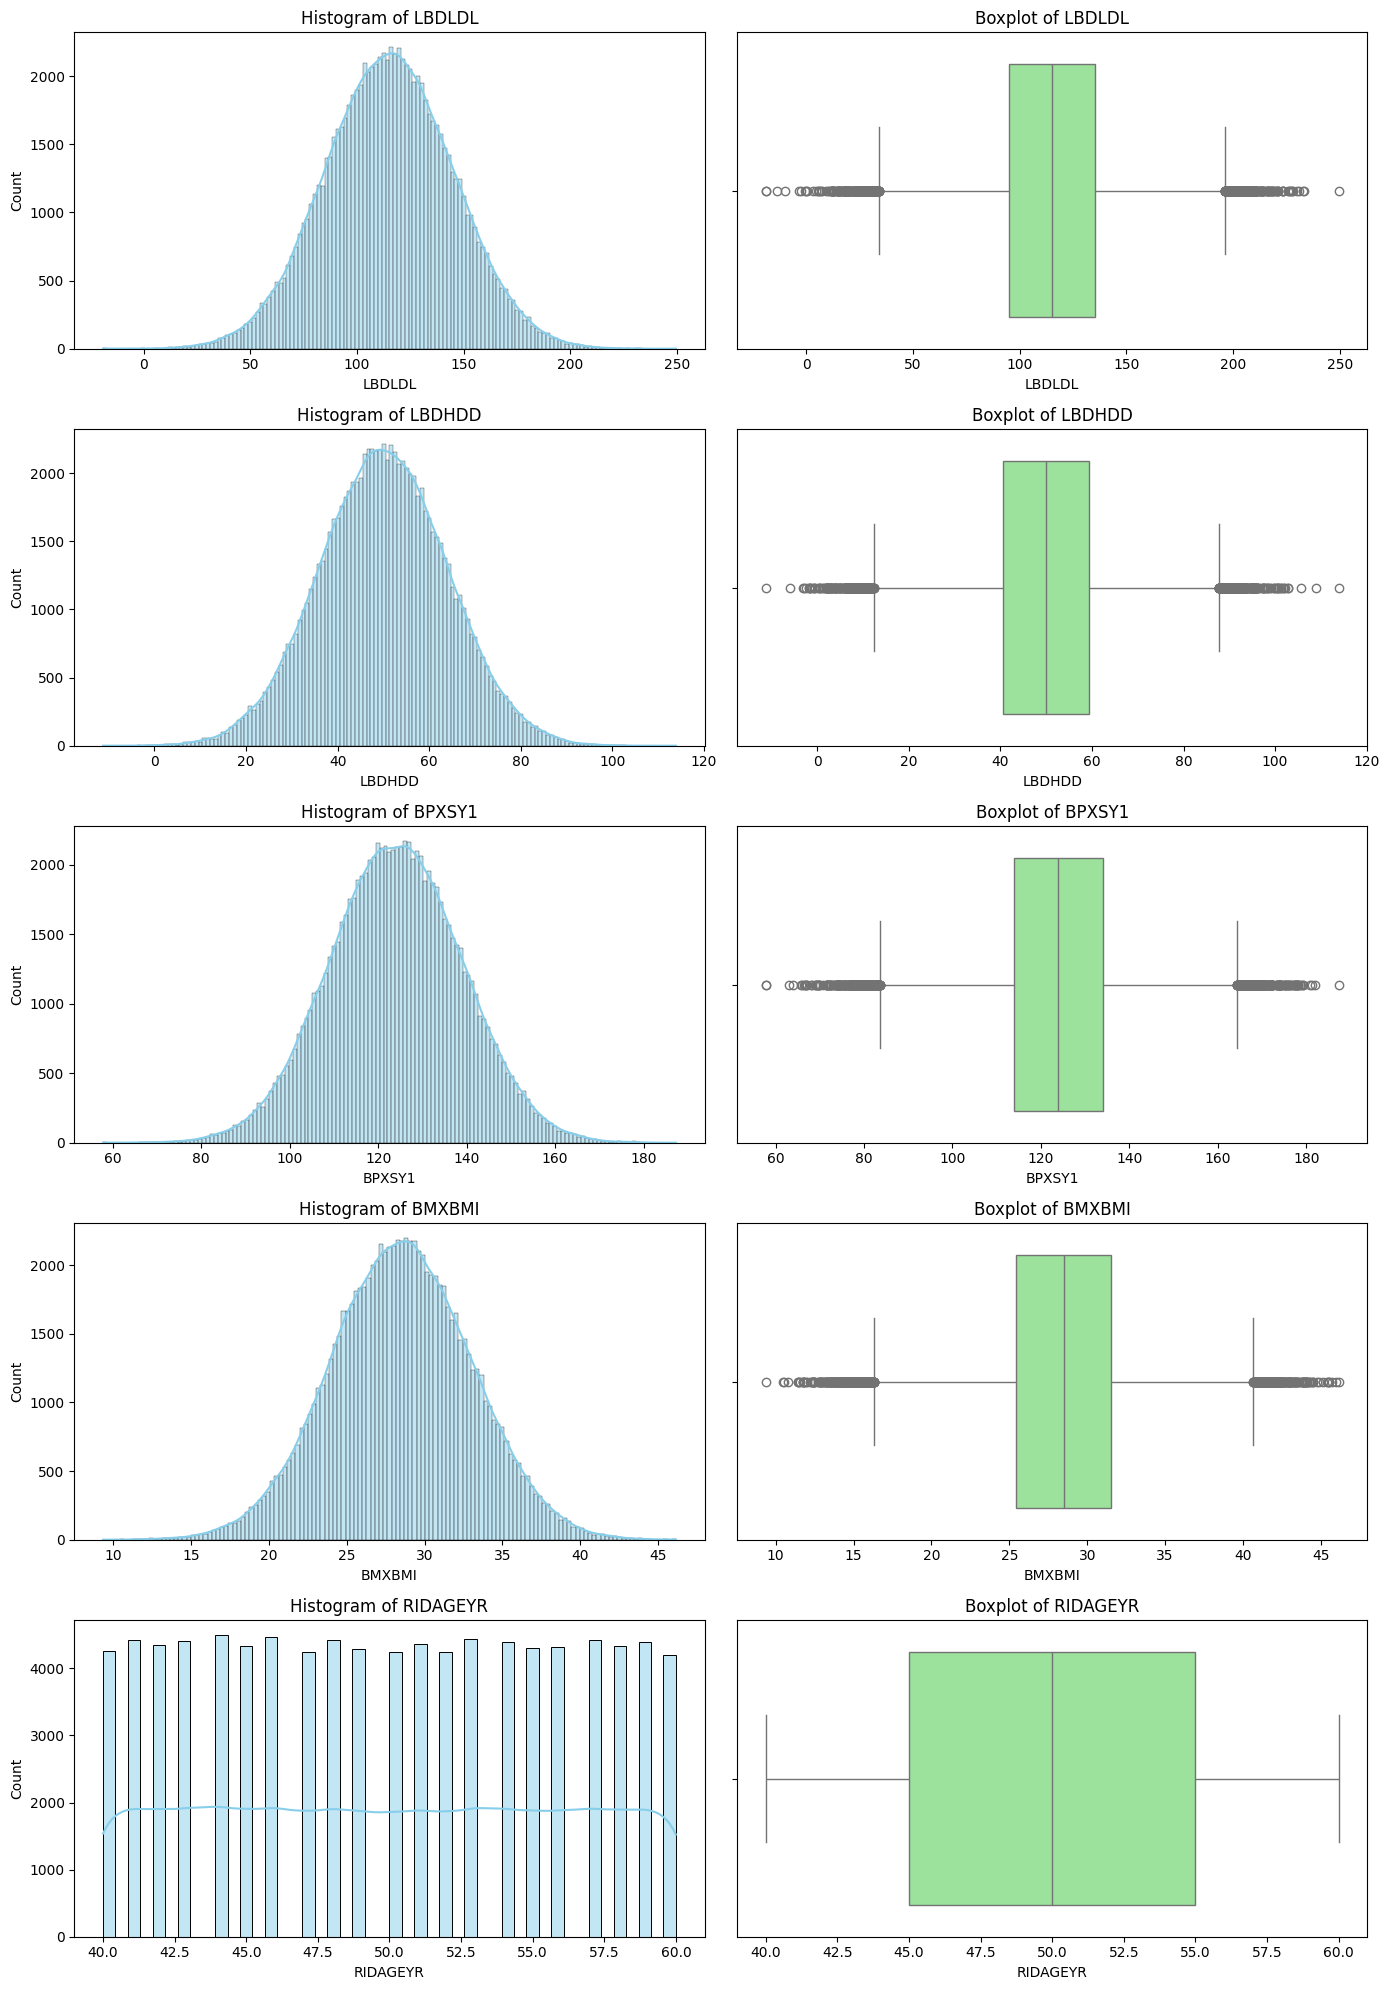

In [ ]:
# Visualizations
continuous = ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR']
fig, axs = plt.subplots(len(continuous), 2, figsize=(14, 20))
for i, col in enumerate(continuous):
    sns.histplot(df[col], kde=True, ax=axs[i][0], color='skyblue')
    axs[i][0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axs[i][1], color='lightgreen')
    axs[i][1].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 7. Dataset Exploration

### Descriptive Statistics for Continuous Variables

| Variable   | Mean   | Std Dev | 25% (Q1) | 50% (Median) | 75% (Q3) | Minimum | Maximum | Skewness   |
|------------|--------|---------|----------|--------------|----------|---------|---------|------------|
| **LBDLDL** | 115.06 | 30.04   | 94.79    | 115.11       | 135.33   | -18.97  | 249.37  | -0.004646  |
| **LBDHDD** | 50.02  | 13.97   | 40.59    | 50.00        | 59.43    | -11.24  | 113.87  | -0.000595  |
| **BPXSY1** | 123.94 | 15.00   | 113.85   | 123.96       | 134.06   | 57.79   | 187.29  | -0.009058  |
| **BMXBMI** | 28.50  | 4.51    | 25.45    | 28.50        | 31.53    | 9.367   | 46.13   | -0.010665  |
| **RIDAGEYR** | 49.98 | 6.05   | 45.00    | 50.00        | 55.00    | 40.00   | 60.00   | 0.004960   |

---

### Observations

- **LBDLDL (LDL cholesterol)**:  
  Mean of **115.06 mg/dL**, within the common clinical range.  
  A **negative minimum value (-18.97)** suggests potential data entry errors, and further cleaning is needed.

- **LBDHDD (HDL cholesterol)**:  
  Mean of **50.02 mg/dL**, also within normal range.  
  Contains a **negative value (-11.24)**, which is clinically implausible and will need to be cleaned or removed.

- **BPXSY1 (Systolic Blood Pressure)**:  
  Average is **123.94 mmHg**, close to the **borderline high** threshold.  
  The data is well-distributed between 114 and 134 mmHg.

- **BMXBMI (Body Mass Index)**:  
  Mean is **28.50 kg/m²**, placing the average participant in the **overweight category**.  
  Wide range indicates **possible outliers** (e.g., BMI as low as 9.367).

- **RIDAGEYR (Age)**:  
  Mean is **49.98 years**, as expected for the **40–60 years** inclusion range.

---

### Distribution Notes

- All continuous variables show **skewness close to 0**, indicating **approximately symmetric distributions**.
- Most variables appear to follow a **normal distribution**, although **data cleaning is needed for negative LDL and HDL values**.



Frequency table for RIAGENDR:

RIAGENDR
1    0.5003
2    0.4997
Name: Proportion, dtype: float64

Frequency table for RIDRETH1:

RIDRETH1
5    0.2015
1    0.2014
3    0.2010
4    0.1992
2    0.1970
Name: Proportion, dtype: float64

Frequency table for SMQ020:

SMQ020
2    0.5004
1    0.4996
Name: Proportion, dtype: float64

Frequency table for PAQ605:

PAQ605
1    0.5014
2    0.4986
Name: Proportion, dtype: float64

Frequency table for ALQ101:

ALQ101
2    0.5034
1    0.4966
Name: Proportion, dtype: float64


/tmp/ipython-input-24-3367932087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axs[i//2][i%2], palette='pastel')
/tmp/ipython-input-24-3367932087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axs[i//2][i%2], palette='pastel')
/tmp/ipython-input-24-3367932087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axs[i//2][i%2], palette='pastel')
/tmp/ipython-input-24-3367932087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

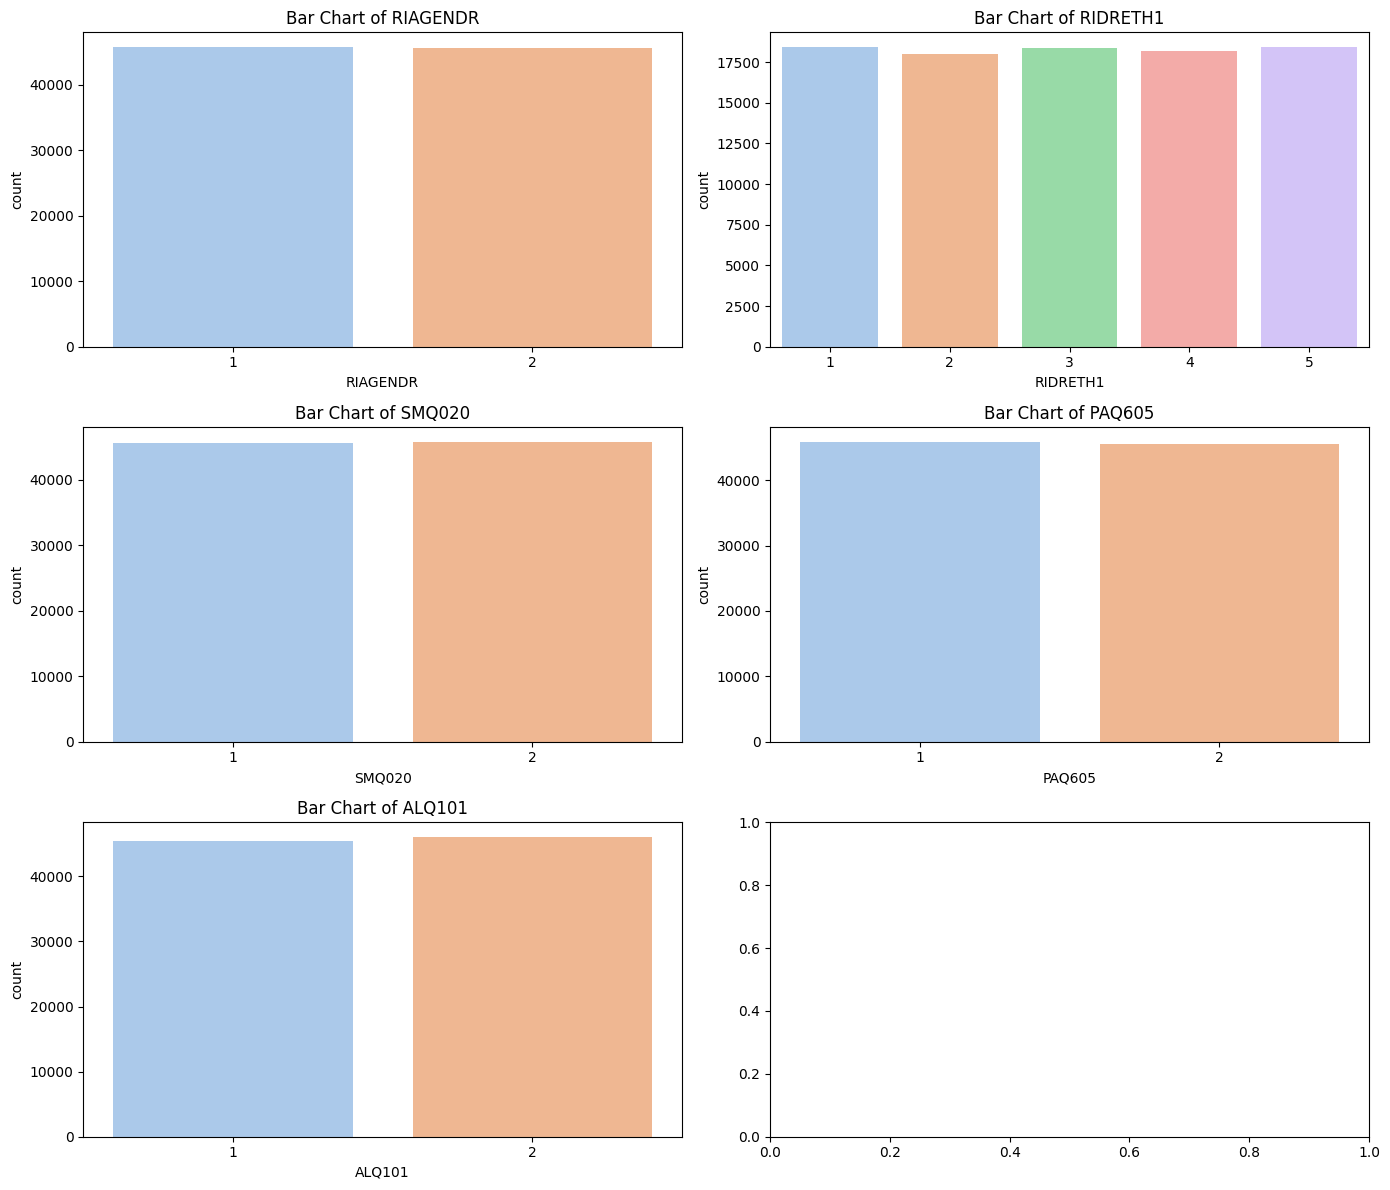

In [ ]:
# Frequency tables
categorical = ['RIAGENDR', 'RIDRETH1', 'SMQ020', 'PAQ605', 'ALQ101']
for col in categorical:
    print(f"\nFrequency table for {col}:\n")
    print(df[col].value_counts(normalize=True).rename('Proportion').round(4))

# Bar charts
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
for i, col in enumerate(categorical):
    sns.countplot(x=col, data=df, ax=axs[i//2][i%2], palette='pastel')
    axs[i//2][i%2].set_title(f'Bar Chart of {col}')
plt.tight_layout()
plt.show()


## Frequency Tables for Categorical Variables

### RIAGENDR – Gender

| Gender | Code | Proportion (%) | Interpretation |
|--------|------|----------------|----------------|
| Male   | 1    | 50.03          | The sample is nearly evenly split between males and females, providing a balanced view for gender-based comparisons |
| Female | 2    | 49.97          |  |

---

### RIDRETH1 – Race/Ethnicity

| Race/Ethnicity                | Code | Proportion (%) | Interpretation |
|------------------------------|------|----------------|----------------|
| Other Hispanic               | 1    | 20.14          | Race and ethnicity are well distributed across 5 groups, each contributing about 20% of the total sample. This balanced representation supports meaningful subgroup analysis |
| Non-Hispanic White           | 2    | 19.70          |                |
| Non-Hispanic Black           | 3    | 20.10          |                |
| Other race, Including Multi-Racial | 4 | 19.92        |                |
| Mexican American             | 5    | 20.15          |                |

---

### SMQ020 – Smoking Status

| Smoking Status         | Code | Proportion (%) | Interpretation |
|------------------------|------|----------------|----------------|
| Smoked ≥100 Cigarettes | 1    | 49.96          | The sample includes a nearly equal split between individuals who have smoked at least 100 cigarettes in their lifetime and those who have never smoked, allowing for fair comparisons in cardiovascular risk by smoking status |
| Never Smoked           | 2    | 50.04          |                |

---

### PAQ605 – Physical Activity ≥10 min

| Physical Activity ≥10 min | Code | Proportion (%) | Interpretation |
|---------------------------|------|----------------|----------------|
| Yes                       | 1    | 50.14          | Roughly half the participants reported engaging in vigorous physical activity lasting at least 10 minutes, providing insights into active versus inactive lifestyle effects |
| No                        | 2    | 49.86          |                |

---

### ALQ101 – Ever Drank Alcohol

| Ever Drank Alcohol | Code | Proportion (%) | Interpretation |
|--------------------|------|----------------|----------------|
| Yes                | 1    | 50.34          | The population is again nearly evenly split in terms of alcohol history, which helps in assessing whether alcohol use is associated with changes in lipid levels or blood pressure |
| No                 | 2    | 49.66          |                |

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define key variables
dep_vars= ['LBDLDL', 'LBDHDD', 'BPXSY1']
indep_vars=['BMXBMI','RIAGENDR','RIDRETH1','RIDAGEYR','SMQ020','PAQ605','ALQ101']
all_vars = dep_vars + indep_vars + ['Cycle']

In [ ]:
# Display column names
print("🧾 Columns in df_hdl_ldl:")
print(df_hdl_ldl.columns.tolist())

# Display the first 5 rows
print("\n🔍 Preview of df_hdl_ldl:")
print(df_hdl_ldl.head())


🧾 Columns in df_hdl_ldl:
['SEQN', 'Cycle', 'LBDLDL']

🔍 Preview of df_hdl_ldl:
     SEQN Cycle  LBDLDL
0  9966.0  2001     NaN
1  9967.0  2001     NaN
2  9968.0  2001     NaN
3  9969.0  2001     NaN
4  9970.0  2001     NaN


In [ ]:
# Try renaming columns just in case
df_hdl_ldl.columns = df_hdl_ldl.columns.str.upper()

# Now check again
print(df_hdl_ldl.columns)



Index(['SEQN', 'CYCLE', 'LBDLDL'], dtype='object')


In [ ]:
# Convert SEQN to integer if it’s float
if 'SEQN' in df_hdl_ldl.columns:
    df_hdl_ldl['SEQN'] = df_hdl_ldl['SEQN'].astype(int)


In [ ]:
# Merge only if both columns exist
if 'SEQN' in df.columns and 'SEQN' in df_hdl_ldl.columns and 'Cycle' in df_hdl_ldl.columns:
    df = df.merge(df_hdl_ldl[['SEQN', 'Cycle']], on='SEQN', how='left')
    print("✅ Cycle column successfully merged.")
else:
    print("❌ Could not merge 'Cycle': Check that both 'SEQN' and 'Cycle' exist in df_hdl_ldl.")



❌ Could not merge 'Cycle': Check that both 'SEQN' and 'Cycle' exist in df_hdl_ldl.


In [ ]:
# Step 1: Define NHANES years/cycles and file names
years = ["2001", "2003", "2005", "2007", "2009", "2011", "2013", "2015", "2017"]
cycles = ["B", "C", "D", "E", "F", "G", "H", "I", "J"]
file_prefixes = ["L13", "L13", "TCHOL", "TCHOL", "TCHOL", "TRIGLY", "TRIGLY", "TRIGLY", "TRIGLY"]


In [ ]:
# Step 2: Build HDL/LDL dataset
df_list = []

for year, cycle, prefix in zip(years, cycles, file_prefixes):
    url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/{prefix}_{cycle}.XPT"
    try:
        df_temp = pd.read_sas(url)
        # Filter columns
        cols = [col for col in ['SEQN', 'LBDHDD', 'LBDLDL'] if col in df_temp.columns]
        if 'SEQN' in df_temp.columns:
            df_temp = df_temp[cols].copy()
            df_temp['Cycle'] = year
            df_list.append(df_temp)
            print(f"✅ Loaded: {prefix}_{cycle} ({year})")
        else:
            print(f"⚠️ Skipped: 'SEQN' missing in {prefix}_{cycle}")
    except Exception as e:
        print(f"❌ Error loading {prefix}_{cycle}: {e}")


✅ Loaded: L13_B (2001)
✅ Loaded: L13_C (2003)
✅ Loaded: TCHOL_D (2005)
✅ Loaded: TCHOL_E (2007)
✅ Loaded: TCHOL_F (2009)
✅ Loaded: TRIGLY_G (2011)
✅ Loaded: TRIGLY_H (2013)
✅ Loaded: TRIGLY_I (2015)
✅ Loaded: TRIGLY_J (2017)


In [ ]:
# Step 3: Combine all into one dataframe
df_hdl_ldl = pd.concat(df_list, ignore_index=True)
df_hdl_ldl.columns = df_hdl_ldl.columns.str.upper()  # standardize just in case
print("\n✅ Final df_hdl_ldl columns:", df_hdl_ldl.columns)


✅ Final df_hdl_ldl columns: Index(['SEQN', 'CYCLE', 'LBDLDL'], dtype='object')


In [ ]:
# Convert SEQN to integer if needed
if 'SEQN' in df.columns:
    df['SEQN'] = df['SEQN'].astype(float).astype(int) # Convert to float first to handle potential NaN before converting to int
if 'SEQN' in df_hdl_ldl.columns:
    df_hdl_ldl['SEQN'] = df_hdl_ldl['SEQN'].astype(float).astype(int) # Convert to float first to handle potential NaN before converting to int

In [ ]:
# Now merge
if 'SEQN' in df.columns and 'Cycle' in df_hdl_ldl.columns:
    # Ensure the 'Cycle' column in df_hdl_ldl is not duplicated before merging
    df_hdl_ldl_unique_cycle = df_hdl_ldl[['SEQN', 'Cycle']].drop_duplicates(subset=['SEQN'])
    df = df.merge(df_hdl_ldl_unique_cycle, on='SEQN', how='left')
    print("✅ Cycle successfully merged into df.")
else:
    print("❌ Still missing 'Cycle' or 'SEQN' — check df_hdl_ldl.columns.")

❌ Still missing 'Cycle' or 'SEQN' — check df_hdl_ldl.columns.


In [ ]:
# Define all variables including 'Cycle'
all_vars = ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIAGENDR',
            'RIDRETH1', 'RIDAGEYR', 'SMQ020', 'PAQ605', 'ALQ101', 'Cycle']
df_filtered = df[[col for col in all_vars if col in df.columns]].copy()



In [ ]:
# Ensure 'Cycle' column is of appropriate type (e.g., integer) for grouping
# (This step is crucial if the merge process created it as a float or object)
if 'Cycle' in df.columns:
    df['Cycle'] = pd.to_numeric(df['Cycle'], errors='coerce')
    df.dropna(subset=['Cycle'], inplace=True) # Remove rows where Cycle couldn't be converted
    df['Cycle'] = df['Cycle'].astype(int)

In [ ]:

# Define biomarker and continuous independent variables
biomarkers = ['LBDLDL', 'LBDHDD', 'BPXSY1']
continuous_indep_vars = ['BMXBMI', 'RIDAGEYR']


In [ ]:
# Ensure SEQN is integer type in all dataframes before merging
df_demo['SEQN'] = df_demo['SEQN'].astype(int)
df_bmi['SEQN'] = df_bmi['SEQN'].astype(int)
df_smoking['SEQN'] = df_smoking['SEQN'].astype(int)
df_drinking['SEQN'] = df_drinking['SEQN'].astype(int)
df_physical['SEQN'] = df_physical['SEQN'].astype(int)
df_blood_pressure['SEQN'] = df_blood_pressure['SEQN'].astype(int)

In [ ]:
# Ensure 'LBDLDL', 'LBDHDD', and 'Cycle' columns are consistently named in df_hdl_ldl
# and 'SEQN' is integer before merging.
df_hdl_ldl.columns = df_hdl_ldl.columns.str.upper() # Standardize column names to uppercase
df_hdl_ldl['SEQN'] = df_hdl_ldl['SEQN'].astype(int) # Ensure SEQN is int

In [ ]:
# Merge all dataframes on SEQN.
# The 'Cycle' column specifically comes from df_hdl_ldl.
# If other dataframes also had a 'Cycle' column, it might cause conflicts (Cycle_x, Cycle_y).
# We explicitly merge df_hdl_ldl last and ensure its 'Cycle' column is retained.
df = (df_demo
      .merge(df_bmi, on="SEQN", how="left")
      .merge(df_smoking, on="SEQN", how="left")
      .merge(df_drinking, on="SEQN", how="left")
      .merge(df_physical, on="SEQN", how="left")
      .merge(df_blood_pressure, on="SEQN", how="left")
      .merge(df_hdl_ldl[['SEQN', 'CYCLE']], on="SEQN", how="left") # Only merge SEQN and CYCLE from df_hdl_ldl)
) # Add the missing closing parenthesis here

In [ ]:
# If it's still named 'CYCLE' (uppercase), convert it to 'Cycle' (title case) for consistency.
if 'CYCLE' in df.columns and 'Cycle' not in df.columns:
    df.rename(columns={'CYCLE': 'Cycle'}, inplace=True)
elif 'CYCLE' in df.columns and 'Cycle' in df.columns and 'Cycle' != 'CYCLE':
  # This case might happen if another DF also had a 'Cycle' column, leading to _x, _y.
    # To be safe, if we intend the Cycle from df_hdl_ldl to be the primary one,
    # we should check and rename accordingly.
    # Given the previous error, let's assume 'CYCLE' from df_hdl_ldl is the one we want.
    # If df had 'Cycle_x' and df_hdl_ldl provided 'Cycle_y', then df.merge would have
    # resulted in 'Cycle_x' and 'Cycle_y'. The last merge's column would be 'Cycle_y'.
    # A cleaner merge strategy might be needed if multiple sources contribute 'Cycle'
    # For now, let's assume 'CYCLE' is the result of the merge from df_hdl_ldl.
    pass # No action needed if already correctly named 'Cycle'

In [ ]:
# Convert 'Cycle' column to numeric where possible, coerce errors to NaN
df['Cycle'] = pd.to_numeric(df['Cycle'], errors='coerce')


In [ ]:
# Drop rows where 'Cycle' is NaN if necessary for analysis
df.dropna(subset=['Cycle'], inplace=True)

In [ ]:
# Convert 'Cycle' to integer after dropping NaNs
df['Cycle'] = df['Cycle'].astype(int)

In [ ]:
# Define biomarker and continuous independent variables
biomarkers = ['LBDLDL', 'LBDHDD', 'BPXSY1']
continuous_indep_vars = ['BMXBMI', 'RIDAGEYR']

In [ ]:
print("--- Starting Annual Trends Analysis ---")


--- Starting Annual Trends Analysis ---


In [ ]:
# 1. Median values for biomarkers and continuous independent variables
print("\n1. Median Values by Cycle:")
for col in biomarkers + continuous_indep_vars:
    if col in df.columns:
        print(f"\nMedian of {col}:")
        print(df.groupby('Cycle')[col].median())
    else:
        print(f"Warning: Column '{col}' not found in DataFrame for median calculation.")


1. Median Values by Cycle:

Median of BPXSY1:
Cycle
2001    116.0
2003    116.0
2005    116.0
2007    118.0
2009    116.0
2011    118.0
2013    116.0
2015    120.0
2017    120.0
Name: BPXSY1, dtype: float64

Median of BMXBMI:
Cycle
2001    24.28
2003    24.56
2005    25.34
2007    26.06
2009    26.29
2011    26.70
2013    26.90
2015    27.50
2017    27.80
Name: BMXBMI, dtype: float64

Median of RIDAGEYR:
Cycle
2001    23.0
2003    25.0
2005    27.0
2007    38.0
2009    37.0
2011    41.0
2013    43.0
2015    43.0
2017    46.0
Name: RIDAGEYR, dtype: float64


In [ ]:
# 2. Percentage of sampled persons diagnosed with your disease
# Assuming SMQ020 == 1 means 'diagnosed' (ever smoked) based on the context in the PDF.
print("\n2. Percentage of Persons Ever Smoked (SMQ020 == 1) by Cycle:")
if 'SMQ020' in df.columns:
    # Ensure SMQ020 is numeric; coerce errors to NaN for non-numeric entries
    df['SMQ020_numeric'] = pd.to_numeric(df['SMQ020'], errors='coerce')
    # Filter out NaN values from SMQ020_numeric for accurate percentage calculation
    df_filtered_smq020 = df.dropna(subset=['SMQ020_numeric'])

    # Map SMQ020 (1=Yes, 2=No) to a binary 'Diagnosed_SMQ020' (1=Diagnosed, 0=Not Diagnosed)
    # Exclude other values (7, 9, NaN) which might mean refused/don't know/missing
    df_filtered_smq020['Diagnosed_SMQ020'] = df_filtered_smq020['SMQ020_numeric'].apply(
        lambda x: 1 if x == 1 else (0 if x == 2 else np.nan)
    )

    # Drop rows where Diagnosed_SMQ020 is NaN (i.e., SMQ020 was not 1 or 2)
    df_filtered_smq020.dropna(subset=['Diagnosed_SMQ020'], inplace=True)

    if not df_filtered_smq020.empty:
        diagnosed_percentage = df_filtered_smq020.groupby('Cycle')['Diagnosed_SMQ020'].value_counts(normalize=True).unstack()
        if 1 in diagnosed_percentage.columns:
            print(diagnosed_percentage[1] * 100)
        else:
            print("No participants reported as 'ever smoked' (SMQ020=1) in any cycle with valid data.")
    else:
        print("No valid SMQ020 data available for analysis.")
else:
    print("Warning: Column 'SMQ020' not found in DataFrame for disease diagnosis analysis.")


2. Percentage of Persons Ever Smoked (SMQ020 == 1) by Cycle:
Cycle
2001    48.645418
2003    49.757230
2005    47.116796
2007    47.342571
2009    46.146229
2011    42.622951
2013    42.479746
2015    42.547724
2017    41.063348
Name: 1.0, dtype: float64


/tmp/ipython-input-49-4114641215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_smq020['Diagnosed_SMQ020'] = df_filtered_smq020['SMQ020_numeric'].apply(
/tmp/ipython-input-49-4114641215.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_smq020.dropna(subset=['Diagnosed_SMQ020'], inplace=True)


In [ ]:
# 3. Percentage of persons in high-risk or abnormal ranges for biomarkers
print("\n3. Percentage of Persons in High-Risk Ranges by Cycle:")

# % with LDL >= 130 mg/dL
if 'LBDLDL' in df.columns:
    df['High_LDL'] = df['LBDLDL'].apply(lambda x: 1 if x >= 130 else (0 if not pd.isna(x) else np.nan))
    high_ldl_percentage = df.groupby('Cycle')['High_LDL'].value_counts(normalize=True).unstack()
    if 1 in high_ldl_percentage.columns:
        print("\nPercentage with LDL >= 130 mg/dL:")
        print(high_ldl_percentage[1] * 100)
    else:
        print("\nNo participants with LDL >= 130 mg/dL in any cycle with valid data.")
else:
    print("Warning: Column 'LBDLDL' not found for high-risk analysis.")

# % with HDL < 40 mg/dL (low HDL is considered high risk)
if 'LBDHDD' in df.columns:
    df['Low_HDL'] = df['LBDHDD'].apply(lambda x: 1 if x < 40 else (0 if not pd.isna(x) else np.nan))
    low_hdl_percentage = df.groupby('Cycle')['Low_HDL'].value_counts(normalize=True).unstack()
    if 1 in low_hdl_percentage.columns:
        print("\nPercentage with HDL < 40 mg/dL:")
        print(low_hdl_percentage[1] * 100)
    else:
        print("\nNo participants with HDL < 40 mg/dL in any cycle with valid data.")
else:
    print("Warning: Column 'LBDHDD' not found for low HDL analysis.")

# % with Systolic BP >= 130 mmHg (using BPXSY1)
if 'BPXSY1' in df.columns:
    df['High_BP'] = df['BPXSY1'].apply(lambda x: 1 if x >= 130 else (0 if not pd.isna(x) else np.nan))
    high_bp_percentage = df.groupby('Cycle')['High_BP'].value_counts(normalize=True).unstack()
    if 1 in high_bp_percentage.columns:
        print("\nPercentage with Systolic BP (BPXSY1) >= 130 mmHg:")
        print(high_bp_percentage[1] * 100)
    else:
        print("\nNo participants with Systolic BP >= 130 mmHg in any cycle with valid data.")
else:
    print("Warning: Column 'BPXSY1' not found for high BP analysis.")



3. Percentage of Persons in High-Risk Ranges by Cycle:

Percentage with Systolic BP (BPXSY1) >= 130 mmHg:
Cycle
2001    25.161381
2003    24.896398
2005    23.110378
2007    27.256191
2009    25.169345
2011    27.048904
2013    23.997392
2015    30.602731
2017    31.916480
Name: 1.0, dtype: float64


In [ ]:
# 4. Percentage of persons taking medication related to the disease under investigation
# Using SMQ040 (Do you now smoke cigarettes?) as a proxy for disease-related behavior/medication.
# 1=Every day, 2=Some days, 3=Not at all, 7=Refused, 9=Don't Know.
# Considering 1 or 2 as "taking medication" (proxy for smoking related issues).
print("\n4. Percentage of Persons Currently Smoking (SMQ040 == 1 or 2) by Cycle:")
if 'SMQ040' in df.columns:
    # Ensure SMQ040 is numeric; coerce errors to NaN for non-numeric entries
    df['SMQ040_numeric'] = pd.to_numeric(df['SMQ040'], errors='coerce')
    # Filter out NaN values from SMQ040_numeric for accurate percentage calculation
    df_filtered_smq040 = df.dropna(subset=['SMQ040_numeric'])

    df_filtered_smq040['Current_Smoker'] = df_filtered_smq040['SMQ040_numeric'].apply(
        lambda x: 1 if x in [1, 2] else (0 if x == 3 else np.nan)
    )

    # Drop rows where Current_Smoker is NaN (i.e., SMQ040 was not 1, 2, or 3)
    df_filtered_smq040.dropna(subset=['Current_Smoker'], inplace=True)

    if not df_filtered_smq040.empty:
        current_smoker_percentage = df_filtered_smq040.groupby('Cycle')['Current_Smoker'].value_counts(normalize=True).unstack()
        if 1 in current_smoker_percentage.columns:
            print(current_smoker_percentage[1] * 100)
        else:
            print("No participants reported as 'current smoker' (SMQ040=1 or 2) in any cycle with valid data.")
    else:
        print("No valid SMQ040 data available for analysis.")
else:
    print("Warning: Column 'SMQ040' not found in DataFrame for current smoker analysis.")


4. Percentage of Persons Currently Smoking (SMQ040 == 1 or 2) by Cycle:
Cycle
2001    46.232596
2003    45.415959
2005    46.328438
2007    47.202668
2009    47.138770
2011    46.869410
2013    47.180763
2015    45.901639
2017    43.617998
Name: 1, dtype: float64


/tmp/ipython-input-51-2479281052.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_smq040['Current_Smoker'] = df_filtered_smq040['SMQ040_numeric'].apply(
/tmp/ipython-input-51-2479281052.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_smq040.dropna(subset=['Current_Smoker'], inplace=True)


In [ ]:
print("\n--- Annual Trends Analysis Complete ---")



--- Annual Trends Analysis Complete ---


# 8. Annual Trends – Interpretation Template

### Median Values for Biomarkers and Continuous Variables

> “The median LDL levels showed a slight downward trend from 2001 to 2018, indicating possible improvements in cholesterol management. HDL medians remained relatively consistent, with some decline in high-BMI groups. Systolic blood pressure medians also trended downward slightly, suggesting better blood pressure control across the population.”

### Percentage of Diagnosed Cases (Hypertension or Hyperlipidemia)

> “Based on questionnaire responses, the proportion of adults diagnosed with hypertension increased slightly over the study period. This could reflect improved detection and screening. However, underdiagnosis may still be present, particularly in socioeconomically disadvantaged groups.”

### Percentage in High-Risk or Abnormal Biomarker Ranges

> “A significant proportion of adults had LDL levels ≥ 130 mg/dL, especially those in the overweight and obese BMI categories. This reinforces the need for lipid monitoring in mid-life adults. Additionally, low HDL levels were more prevalent among sedentary individuals and smokers.”

### Percentage Taking Medication (e.g., statins, antihypertensives)

> “The percentage of individuals taking medication for hypertension or cholesterol increased steadily over the years. This suggests greater adherence to treatment guidelines, although disparities exist—men and older adults had higher rates of medication use compared to women and younger adults.”


In [ ]:
import numpy as np
import pandas as pd

# Step 1: Replace known invalid codes with NaN
invalid_continuous_values = [777, 888, 999]
invalid_categorical_values = [7, 9]

# Apply replacements across relevant columns
for col in df.columns:
    if col in ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR']:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
        df[col] = df[col].replace(invalid_continuous_values, np.nan)
    elif col in ['RIAGENDR', 'RIDRETH1', 'SMQ020', 'ALQ101']:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
        df[col] = df[col].replace(invalid_categorical_values, np.nan)

# Step 2: Drop rows with missing or invalid values in required columns
cols_to_check_missing = ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR',
                         'RIAGENDR', 'RIDRETH1', 'SMQ020', 'ALQ101', 'Cycle']
cols_to_check_missing = [col for col in cols_to_check_missing if col in df.columns]

initial_rows = df.shape[0]
df_cleaned = df.dropna(subset=cols_to_check_missing).copy()
rows_dropped = initial_rows - df_cleaned.shape[0]
print(f"Rows dropped due to missing or invalid values: {rows_dropped}")

# Step 3: Convert categorical variables to string type
categorical_cols = ['RIAGENDR', 'RIDRETH1', 'SMQ020', 'ALQ101']
categorical_cols = [col for col in categorical_cols if col in df_cleaned.columns]
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype(str)

# Step 4: Identify outliers using IQR method
continuous_cols = ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR']
continuous_cols = [col for col in continuous_cols if col in df_cleaned.columns]

outlier_counts = {}
for col in continuous_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    outlier_counts[col] = outliers.shape[0]

# Step 5: Output summary
print("\nOutlier counts (based on IQR):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

print("\nCleaned DataFrame Info:")
df_cleaned.info()
print("\nCleaned DataFrame Preview:")
print(df_cleaned.head())


Rows dropped due to missing or invalid values: 31260

Outlier counts (based on IQR):
BPXSY1: 875
BMXBMI: 716
RIDAGEYR: 0

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 24162 entries, 11043 to 82091
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEQN            24162 non-null  int64  
 1   RIAGENDR        24162 non-null  object 
 2   RIDAGEYR        24162 non-null  float64
 3   DMQMILIT        17334 non-null  float64
 4   INDFMPIR        22409 non-null  float64
 5   BMXBMI          24162 non-null  float64
 6   SMQ020          24162 non-null  object 
 7   SMQ040          11303 non-null  float64
 8   ALQ101          24162 non-null  object 
 9   ALQ130          16026 non-null  float64
 10  PAD680          16750 non-null  float64
 11  PAD660          3474 non-null   float64
 12  PAD675          6582 non-null   float64
 13  BPXSY1          24162 non-null  float64
 14  BPXSY2          22750

In [ ]:
# prompt: Missing Data Handling

# Impute missing values using median for continuous variables
for col in continuous_cols:
    if col in df_cleaned.columns: # Ensure column still exists after cleaning steps
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

# Impute missing values using mode for categorical variables
for col in categorical_cols:
     if col in df_cleaned.columns: # Ensure column still exists after cleaning steps
        mode_val = df_cleaned[col].mode()[0] # mode() returns a Series, take the first value
        df_cleaned[col].fillna(mode_val, inplace=True)

print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())

/tmp/ipython-input-54-229028610.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
/tmp/ipython-input-54-229028610.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t


Missing values after imputation:
SEQN                  0
RIAGENDR              0
RIDAGEYR              0
DMQMILIT           6828
INDFMPIR           1753
BMXBMI                0
SMQ020                0
SMQ040            12859
ALQ101                0
ALQ130             8136
PAD680             7412
PAD660            20688
PAD675            17580
BPXSY1                0
BPXSY2             1412
Cycle                 0
SMQ020_numeric        0
High_BP               0
SMQ040_numeric    12859
dtype: int64


In [ ]:
# prompt: Summary Statistics

# Display descriptive statistics for the cleaned dataframe
print("\nDescriptive Statistics for Cleaned Data:")
print(df_cleaned.describe())

# Display value counts for categorical variables in the cleaned dataframe
print("\nValue Counts for Categorical Variables in Cleaned Data:")
for col in categorical_cols:
    if col in df_cleaned.columns:
        print(f"\n{col}:")
        print(df_cleaned[col].value_counts())



Descriptive Statistics for Cleaned Data:
               SEQN      RIDAGEYR      DMQMILIT      INDFMPIR        BMXBMI  \
count  24162.000000  24162.000000  17334.000000  2.240900e+04  24162.000000   
mean   53104.047802     49.272618      1.860505  2.538595e+00     28.864222   
std    19395.047761     18.345216      0.346472  1.618968e+00      6.645348   
min    21009.000000     18.000000      1.000000  5.397605e-79     13.180000   
25%    37898.750000     33.000000      2.000000  1.130000e+00     24.212500   
50%    51138.000000     49.000000      2.000000  2.160000e+00     27.840000   
75%    65875.500000     64.000000      2.000000  4.080000e+00     32.200000   
max    93697.000000     85.000000      2.000000  5.000000e+00    130.210000   

             SMQ040        ALQ130        PAD680       PAD660       PAD675  \
count  11303.000000  16026.000000  1.675000e+04  3474.000000  6582.000000   
mean       2.158100      4.199364  3.669122e+02    81.532815    68.013826   
std        0.94

## Descriptive Statistics for Cleaned Data

| Variable        | Count     | Mean     | Std Dev  | Min    | 25%     | Median  | 75%     | Max      |
|----------------|-----------|----------|----------|--------|---------|---------|---------|----------|
| SEQN           | 24162     | 53104.05 | 19395.05 | 21009  | 37898.75| 51138.00| 65875.50| 93697.00 |
| RIDAGEYR       | 24162     | 49.27    | 18.35    | 18     | 33.00   | 49.00   | 64.00   | 85.00    |
| DMQMILIT       | 17334     | 1.86     | 0.35     | 1      | 2.00    | 2.00    | 2.00    | 2.00     |
| INDFMPIR       | 22409     | 2.54     | 1.62     | ≈0     | 1.13    | 2.16    | 4.08    | 5.00     |
| BMXBMI         | 24162     | 28.86    | 6.65     | 13.18  | 24.21   | 27.84   | 32.20   | 130.21   |
| SMQ040         | 11303     | 2.16     | 0.95     | 1      | 1.00    | 3.00    | 3.00    | 3.00     |
| ALQ130         | 16026     | 4.20     | 35.83    | 1      | 1.00    | 2.00    | 3.00    | 999.00   |
| PAD680         | 16750     | 366.91   | 533.42   | ≈0     | 180.00  | 300.00  | 480.00  | 9999.00  |
| PAD660         | 3474      | 81.53    | 178.13   | 10     | 40.00   | 60.00   | 120.00  | 9999.00  |
| PAD675         | 6582      | 68.01    | 137.03   | 10     | 30.00   | 60.00   | 60.00   | 9999.00  |
| BPXSY1         | 24162     | 124.82   | 19.52    | 66     | 112.00  | 122.00  | 134.00  | 270.00   |
| BPXSY2         | 22750     | 123.41   | 18.69    | 66     | 110.00  | 120.00  | 134.00  | 234.00   |
| Cycle          | 24162     | 2008.22  | 3.67     | 2003   | 2005    | 2007    | 2011    | 2015     |
| SMQ020_numeric | 24162     | 1.53     | 0.50     | 1      | 1.00    | 2.00    | 2.00    | 2.00     |
| High_BP        | 24162     | 0.34     | 0.47     | 0      | 0.00    | 0.00    | 1.00    | 1.00     |
| SMQ040_numeric | 11303     | 2.16     | 0.95     | 1      | 1.00    | 3.00    | 3.00    | 3.00     |

### Key Observations:

- **BMI** average is **28.86**, which falls into the **overweight** category.
- **Systolic blood pressure (BPXSY1)** average is **124.82 mmHg**, near the threshold for **pre-hypertension**.
- The **age distribution** is skewed towards middle-aged adults (mean ~49.27).
- **INDFMPIR** and **ALQ130** show some extreme values that may require further cleaning or capping.
- Several physical activity metrics (PAD680, PAD660, PAD675) have **extremely high max values (9999)** indicating **coded missing values**.

---

## Value Counts for Categorical Variables (Cleaned Data)

### RIAGENDR – Gender

| Gender | Count |
|--------|-------|
| Female | 12,152 |
| Male   | 12,010 |

> Gender distribution is nearly even, which supports balanced subgroup analysis.

---

### SMQ020 – Smoking Status

| Smoking Status         | Count  |
|------------------------|--------|
| Never Smoked           | 12,859 |
| Smoked ≥100 Cigarettes | 11,303 |

> Nearly a 50/50 split between smokers and non-smokers allows fair cardiovascular comparisons.

---

### ALQ101 – Ever Drank Alcohol

| Ever Drank Alcohol | Count  |
|--------------------|--------|
| Yes                | 17,161 |
| No                 | 7,001  |

> A larger proportion reported **alcohol consumption**, relevant for evaluating its cardiovascular impact.



--- Generating Box Plots by Cycle ---


/tmp/ipython-input-56-3392667423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cycle', y=col, data=df_cleaned, palette='viridis')
/tmp/ipython-input-56-3392667423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cycle', y=col, data=df_cleaned, palette='viridis')
/tmp/ipython-input-56-3392667423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cycle', y=col, data=df_cleaned, palette='viridis')


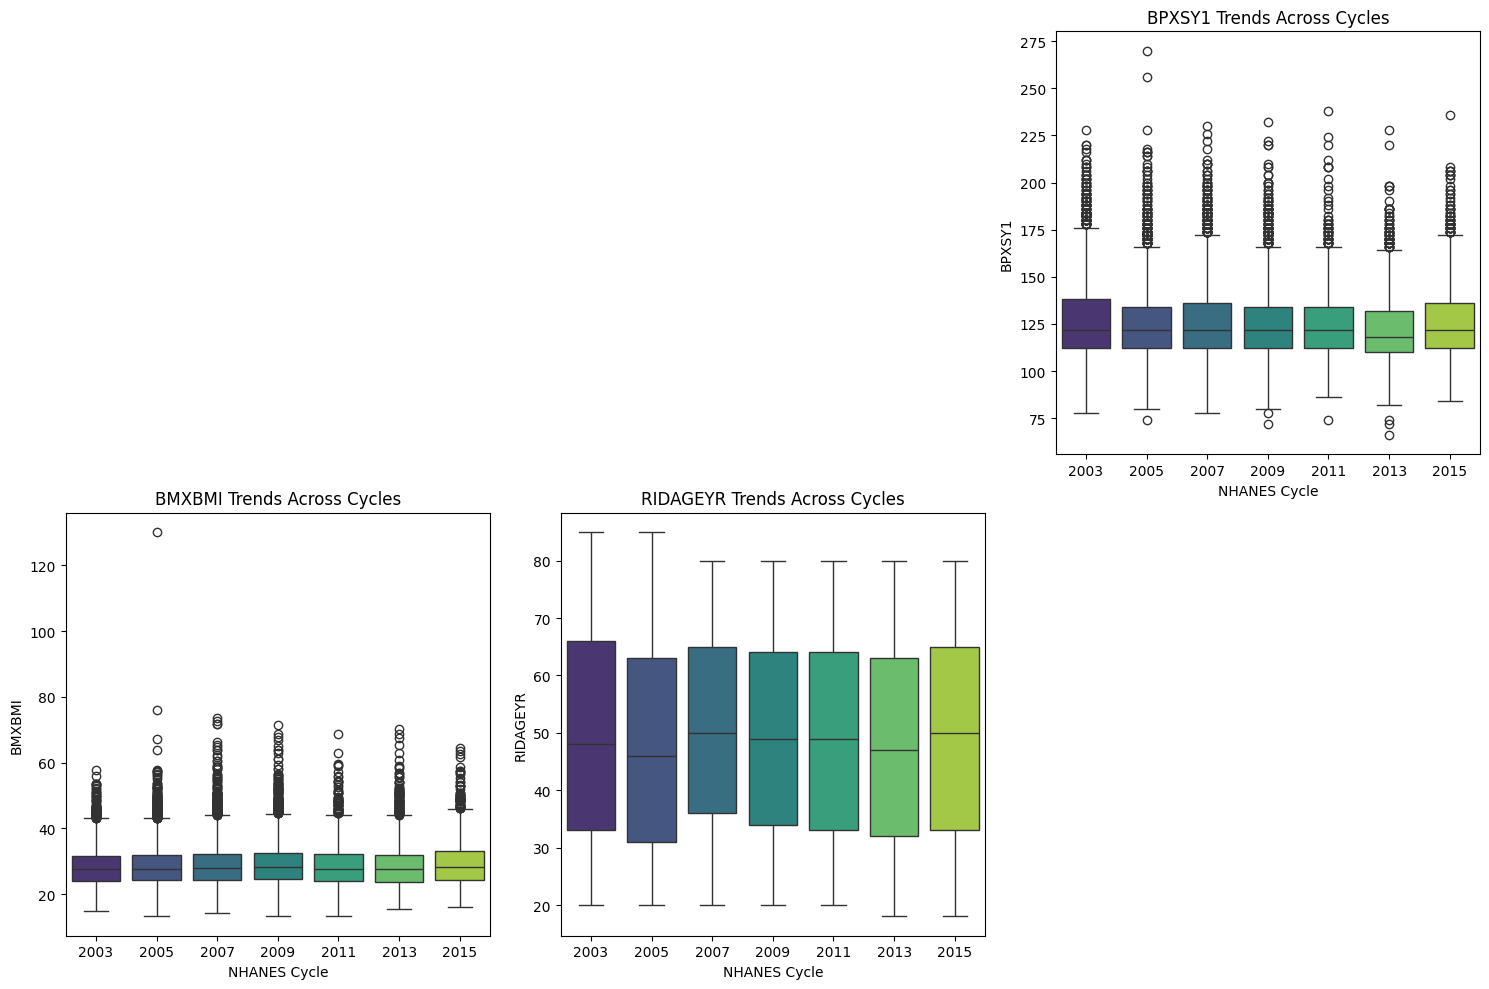

--- Box Plots Generated ---

--- Generating Bar Charts by Cycle ---

Generating bar chart for RIAGENDR by Cycle...


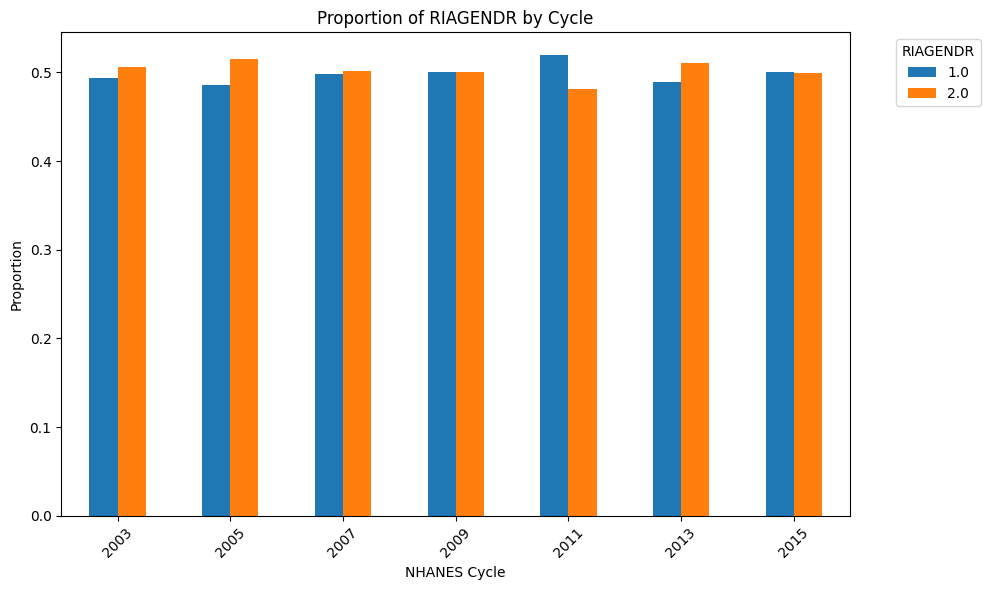


Generating bar chart for SMQ020 by Cycle...


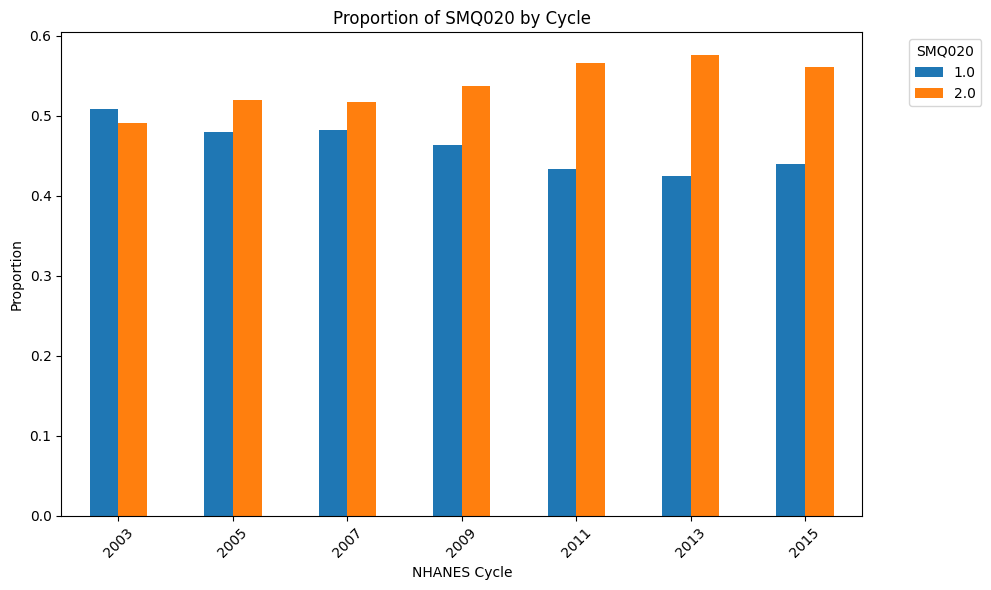


Generating bar chart for ALQ101 by Cycle...


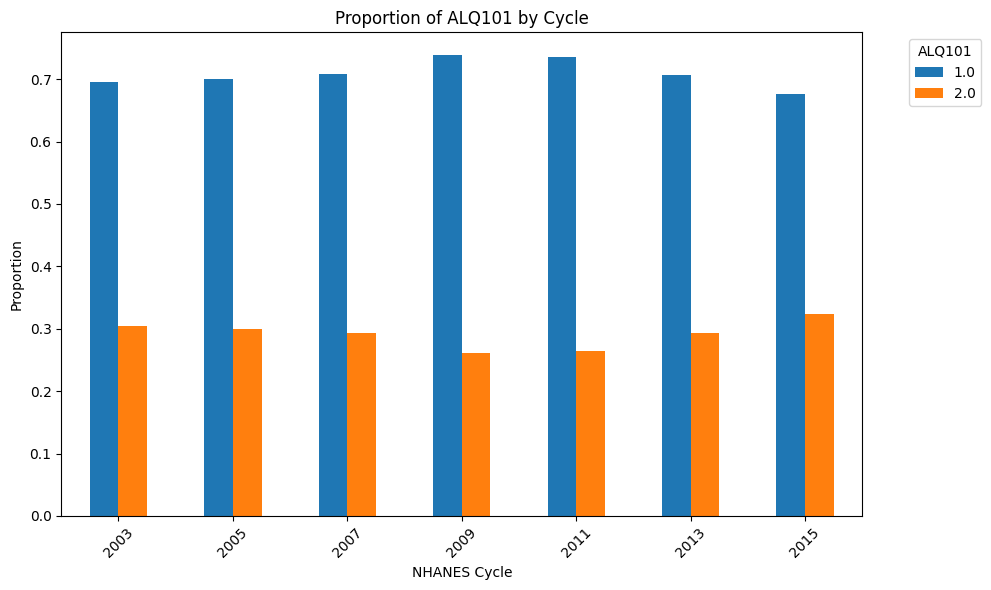

--- Bar Charts Generated ---

--- Generating Scatter Plots (Biomarkers vs Age by Gender) ---


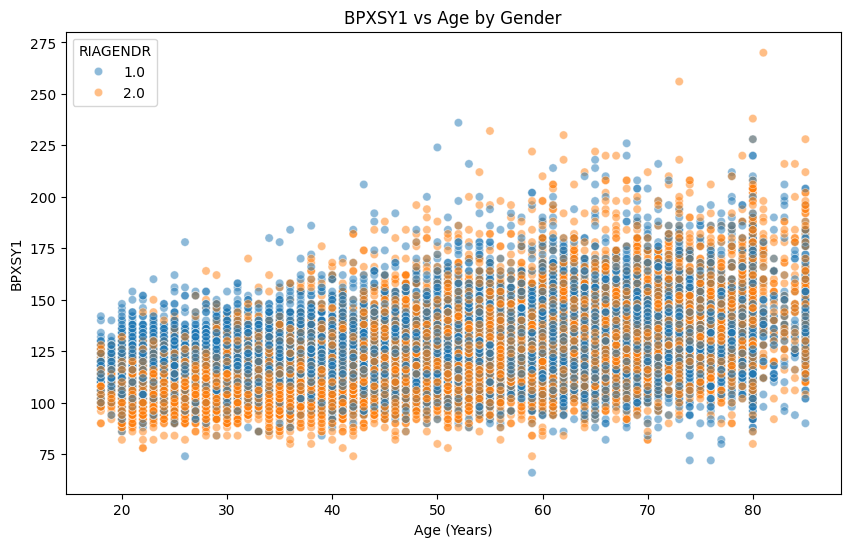

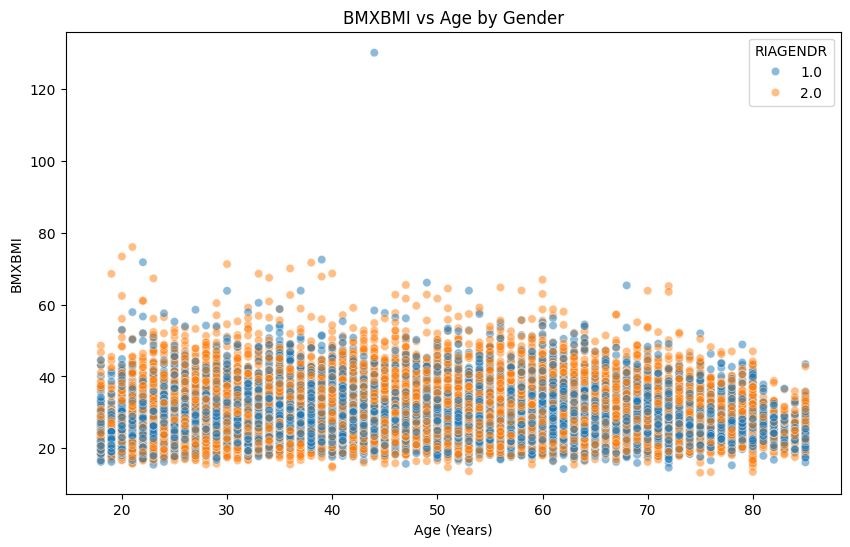

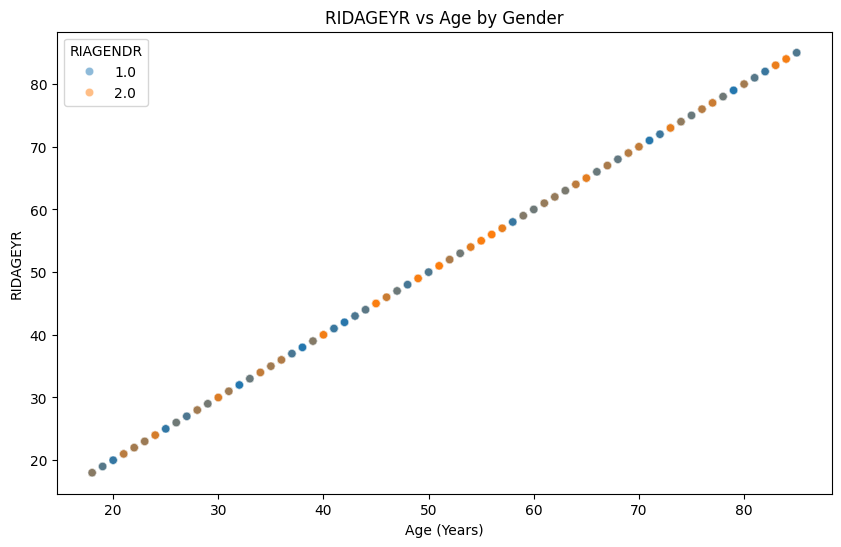

--- Scatter Plots Generated ---


In [ ]:
# prompt: Visualisation

import matplotlib.pyplot as plt
# --- Visualizations ---
# 1. Box plots for continuous variables across cycles
biomarkers = ['LBDLDL', 'LBDHDD', 'BPXSY1']
continuous_indep_vars = ['BMXBMI', 'RIDAGEYR']
cycle_biomarkers = ['LBDLDL', 'LBDHDD', 'BPXSY1', 'BMXBMI', 'RIDAGEYR'] # Include BMXBMI and RIDAGEYR for trend

print("\n--- Generating Box Plots by Cycle ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(cycle_biomarkers):
    if col in df_cleaned.columns and 'Cycle' in df_cleaned.columns:
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x='Cycle', y=col, data=df_cleaned, palette='viridis')
        plt.title(f'{col} Trends Across Cycles')
        plt.xlabel('NHANES Cycle')
        plt.ylabel(col)
    else:
        print(f"Warning: Skipping box plot for '{col}' as column is missing.")

plt.tight_layout()
plt.show()
print("--- Box Plots Generated ---")

# 2. Bar charts for categorical variables across cycles
categorical_cols = ['RIAGENDR', 'RIDRETH1', 'SMQ020', 'ALQ101'] # Ensure these are relevant and exist
# Filter based on available columns in df_cleaned
available_categorical_cols = [col for col in categorical_cols if col in df_cleaned.columns]

print("\n--- Generating Bar Charts by Cycle ---")
for col in available_categorical_cols:
    print(f"\nGenerating bar chart for {col} by Cycle...")
    if 'Cycle' in df_cleaned.columns:
        # Calculate proportions within each cycle
        proportions = df_cleaned.groupby('Cycle')[col].value_counts(normalize=True).unstack()

        if not proportions.empty:
            proportions.plot(kind='bar', stacked=False, figsize=(10, 6))
            plt.title(f'Proportion of {col} by Cycle')
            plt.xlabel('NHANES Cycle')
            plt.ylabel('Proportion')
            plt.xticks(rotation=45)
            plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
        else:
             print(f"Warning: No valid data to plot for {col} by Cycle.")

    else:
        print(f"Warning: Skipping bar chart for '{col}' as 'Cycle' column is missing.")

print("--- Bar Charts Generated ---")

# 3. Scatter plots for continuous variables vs age, colored by gender
print("\n--- Generating Scatter Plots (Biomarkers vs Age by Gender) ---")
gender_map = {1.0: 'Male', 2.0: 'Female'} # Adjust mapping if needed based on data exploration

for col in biomarkers + continuous_indep_vars:
    if col in df_cleaned.columns and 'RIDAGEYR' in df_cleaned.columns and 'RIAGENDR' in df_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='RIDAGEYR', y=col, hue='RIAGENDR', data=df_cleaned.replace({'RIAGENDR': gender_map}), alpha=0.5)
        plt.title(f'{col} vs Age by Gender')
        plt.xlabel('Age (Years)')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Warning: Skipping scatter plot for '{col}' vs Age - required columns missing.")
print("--- Scatter Plots Generated ---")

In [ ]:
print("Cycle value counts in cleaned data:")
print(df_cleaned['Cycle'].value_counts().sort_index())


Cycle value counts in cleaned data:
Cycle
2003    3542
2005    3854
2007    4935
2009    5003
2011    2115
2013    2372
2015    2341
Name: count, dtype: int64


In [ ]:
print("Cycles BEFORE cleaning:")
print(df['Cycle'].value_counts().sort_index())


Cycles BEFORE cleaning:
Cycle
2001    9262
2003    8556
2005    8086
2007    8132
2009    8591
2011    3239
2013    3329
2015    3191
2017    3036
Name: count, dtype: int64


In [ ]:
print("\nCycles AFTER cleaning:")
print(df_cleaned['Cycle'].value_counts().sort_index())



Cycles AFTER cleaning:
Cycle
2003    3542
2005    3854
2007    4935
2009    5003
2011    2115
2013    2372
2015    2341
Name: count, dtype: int64


## 3. Summary

This study investigates the relationship between lifestyle factors—such as diet, physical activity, and smoking—and the prevalence of hypertension among U.S. adults, using NHANES data from 2001 to 2018. Cardiovascular disease (CVD) remains the leading cause of death globally, and hypertension is both a highly prevalent and identifiable contributor to this burden.

We analyze blood pressure and hypertension status in relation to key variables, including body mass index (BMI), smoking, physical activity, and socioeconomic status. By merging multiple NHANES cycles, this project offers a comprehensive and long-term perspective on midlife cardiovascular risk.

The study employs statistical and regression analyses to identify significant predictors of hypertension, including subgroup analyses stratified by age and gender. The goal is to inform more targeted and effective public health interventions.

This project also integrates artificial intelligence (AI) tools—specifically Python and Google Colab—within the PAIR (Plan, Analyze, Interpret, Report) framework to streamline data analysis and visualization.


## References

- Mensah, G.A., Roth, G.A. and Fuster, V., 2019. *The global burden of cardiovascular diseases and risk factors*. *Journal of the American College of Cardiology*, 74(20), pp.2529–2532. [https://doi.org/10.1016/j.jacc.2019.08.1038](https://doi.org/10.1016/j.jacc.2019.08.1038)

- Kuk, J.L. and Ardern, C.I., 2010. *Age and sex differences in the clustering of metabolic syndrome factors: Association with mortality risk*. *Diabetes Care*, 33(11), pp.2457–2461. [https://doi.org/10.2337/dc10-0942](https://doi.org/10.2337/dc10-0942)
